PCA:

all dimensions: ['slowWaveSleep' 'dreamSleep' 'sleep' 'body' 'brain' 'life' 'gestation'
 'predation' 'sleepExposure' 'danger']
 
Annotation: species names

In [5]:
# from loaddata import load_data
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt # to show images
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import io
import requests
import numpy as np

from sklearn.decomposition import PCA # for PCA calculation

In [6]:
### load data ###
def load_data(path="./data/sleep_original.csv", fill_nan=-999.00, filter_nan=False, filter_list=[]):
    '''
        path: local directory of original data file
        fill_nan: replace NaN with specified number
        filter_nan: filter out data with NaN values
    '''
    
    # load data
    path = "./data/sleep_original.csv"
    if os.path.isfile(path):
        csv_file = pd.read_csv(path)
    else:
        url = "https://yao-lab.github.io/data/sleep1.csv" # Load original data
        src = requests.get(url).content
        csv_file = pd.read_csv(io.StringIO(src.decode('utf-8')))
    
    if filter_nan:
        if len(filter_list) == 0:
            filter_list = np.array(csv_file.columns)
        idx = []
        for x in filter_list:
            if len(idx) == 0:
                idx = csv_file[x].isna()
            else:
                idx = idx + (csv_file[x].isna())
        idx = list(map(lambda x: not x, idx))
        csv_file = csv_file[idx]
    else:
        csv_file = csv_file.fillna(fill_nan) # Replace NaN with -999.00 (regarded as infinitely negative)
    print("csv file size: ", csv_file.shape)
    
    # Extra data with attributes (dimensions), specials, and numeric data
    data = np.array(csv_file)[:, 1:]
    attrs = np.array(csv_file.columns[1:])
    species = np.array(csv_file)[:, 0]

    print("%d Attributes: " %len(attrs))
    print(attrs)
    print("%d Species: " %len(species))
    print(species)
    print("Data shape: ", data.shape) #get data size
    print(data[:5])
    print()
    
    return attrs, species, data

In [4]:
attrs, species, data = load_data()
_, filtered_species, filtered_data = load_data(filter_nan=True)

csv file size:  (62, 11)
10 Attributes: 
['slowWaveSleep' 'dreamSleep' 'sleep' 'body' 'brain' 'life' 'gestation'
 'predation' 'sleepExposure' 'danger']
62 Species: 
['African_elephant' 'African_giant_pouched_rat' 'Arctic_Fox'
 'Arctic_ground_squirrel' 'Asian_elephant' 'Baboon' 'Big_brown_bat'
 'Brazilian_tapir' 'Cat' 'Chimpanzee' 'Chinchilla' 'Cow' 'Desert_hedgehog'
 'Donkey' 'Eastern_American_mole' 'Echidna' 'European_hedgehog' 'Galago'
 'Genet' 'Giant_armadillo' 'Giraffe' 'Goat' 'Golden_hamster' 'Gorilla'
 'Gray_seal' 'Gray_wolf' 'Ground_squirrel' 'Guinea_pig' 'Horse' 'Jaguar'
 'Kangaroo' 'Lesser_short-tailed_shrew' 'Little_brown_bat' 'Human'
 'Mole_rat' 'Mountain_beaver' 'Mouse' 'Musk_shrew' 'N._American_opossum'
 'Nine-banded_armadillo' 'Okapi' 'Owl_monkey' 'Patas_monkey' 'Phanlanger'
 'Pig' 'Rabbit' 'Raccoon' 'Rat' 'Red_fox' 'Rhesus_monkey'
 'Rock_hyrax_(Hetero._b)' 'Rock_hyrax_(Procavia_hab)' 'Roe_deer' 'Sheep'
 'Slow_loris' 'Star-nosed_mole' 'Tenrec' 'Tree_hyrax' 'Tree_shrew'
 '

C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


In [25]:
def _PCA(attris, species, data):
    p = len(attrs)
    n = len(data)

    # mean value
    mu = np.mean(data, axis=0);
    print("mean: ", mu)

    # get PCA
    pca = PCA(n_components=2, svd_solver='arpack')
    pca.fit(data)
    print(pca.explained_variance_ratio_.shape) 
    print(pca.singular_values_.shape)

    # Plot PCA chart
    plt.plot(pca.explained_variance_ratio_, "o", linewidth=2)
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_ratio_')
    plt.show()
    
    # Show top 3 components
    Y = pca.components_;
    print(Y.shape) # number of components
#     print(Y)
    X_reduction = pca.transform(data)
    
    return X_reduction, pca

mean:  [-218.86612903225804 -191.76451612903224 -54.598387096774175
 198.78998387096775 283.1341935483871 -45.856451612903236
 68.71774193548387 2.870967741935484 2.4193548387096775 2.6129032258064515]
(2,)
(2,)


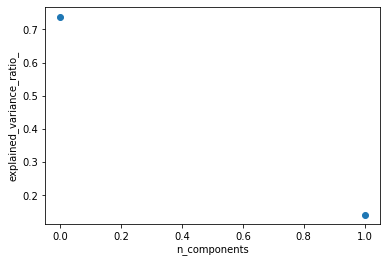

(2, 10)


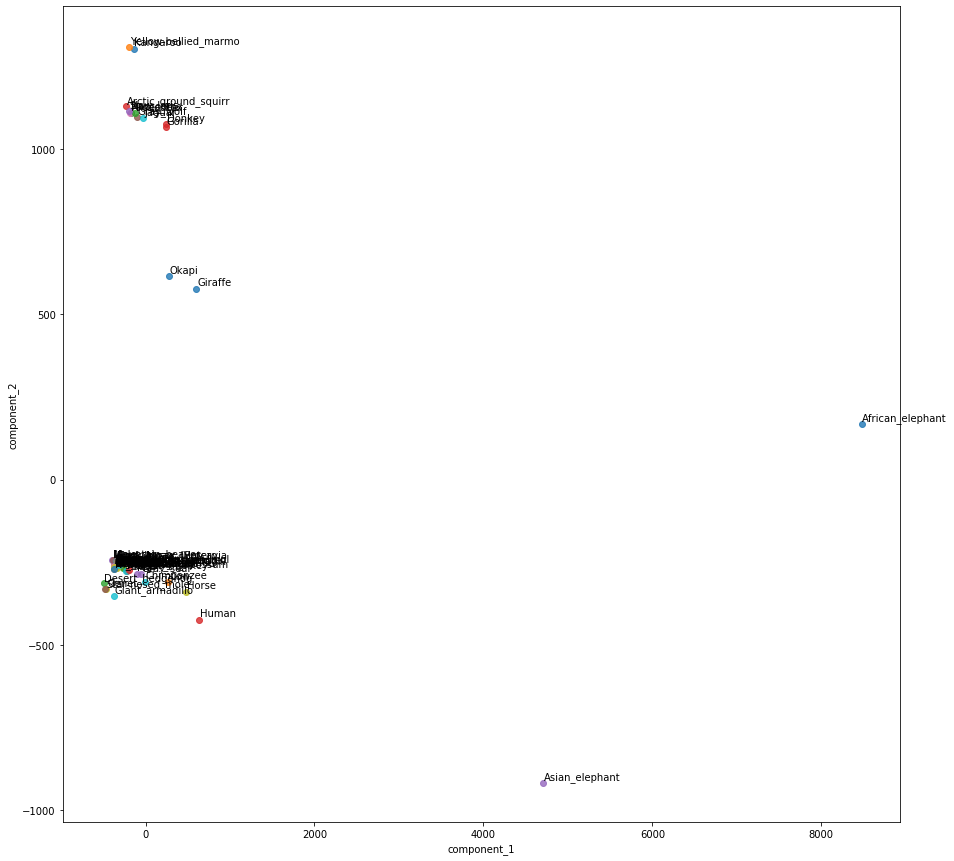

In [36]:
X = _PCA(attrs, species, data)[0]

plt.figure(figsize=(15,15))
for i in range(len(species)):
    plt.scatter(X[i, 0], X[i, 1], alpha=0.8, label=species[i])
    plt.annotate(species[i][:20], (X[i, 0]+10, X[i, 1]+10))
    
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()

mean:  [8.74285714285714 1.8999999999999992 10.642857142857142 100.81390476190475
 218.68380952380946 19.371428571428574 129.9404761904762
 2.9523809523809526 2.357142857142857 2.6904761904761907]
(2,)
(2,)


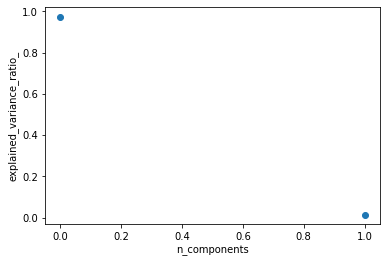

(2, 10)


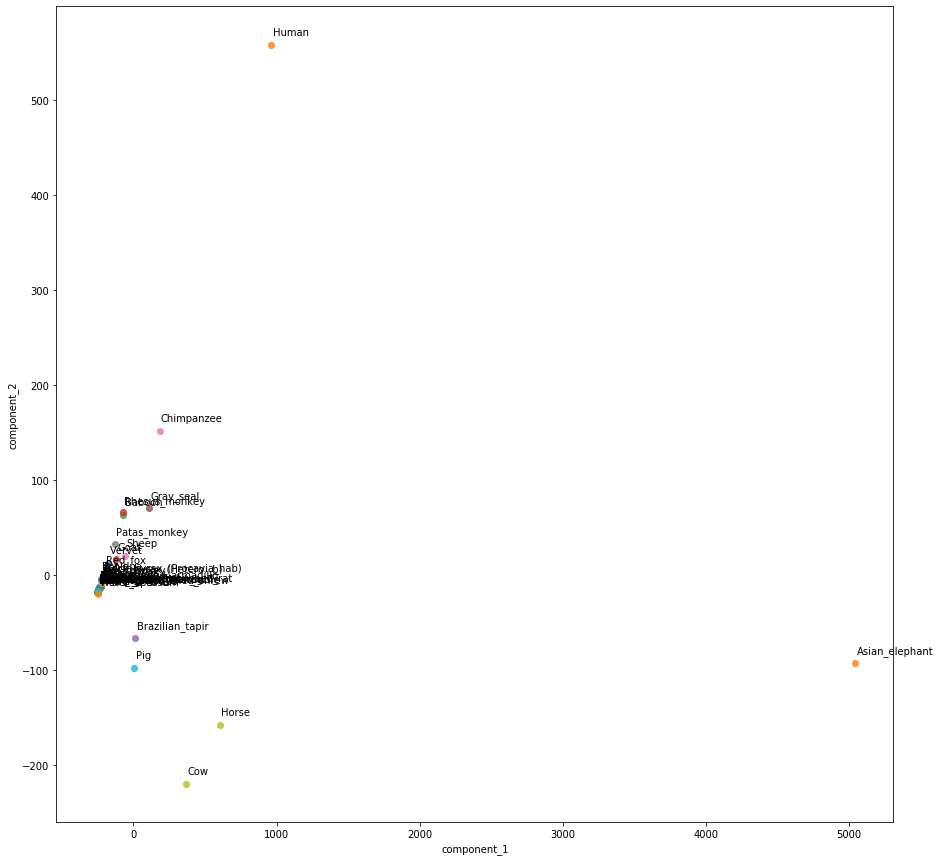

In [38]:
X_filter = _PCA(attrs, filtered_species, filtered_data)[0]

plt.figure(figsize=(15,15))
for i in range(len(filtered_species)):
    plt.scatter(X_filter[i, 0], X_filter[i, 1], alpha=0.8, label=filtered_species[i])
    plt.annotate(filtered_species[i], (X_filter[i, 0]+10, X_filter[i, 1]+10))
    
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()

mean:  [9.335135135135133 1.9783783783783777 11.313513513513513
 15.865513513513516 47.12756756756756 14.01621621621622 100.52702702702703
 2.945945945945946 2.2162162162162162 2.6216216216216215]
(2,)
(2,)


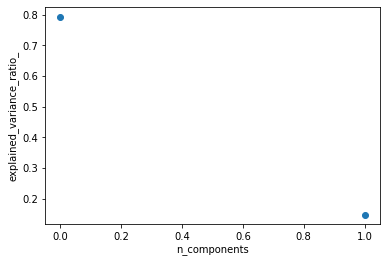

(2, 10)


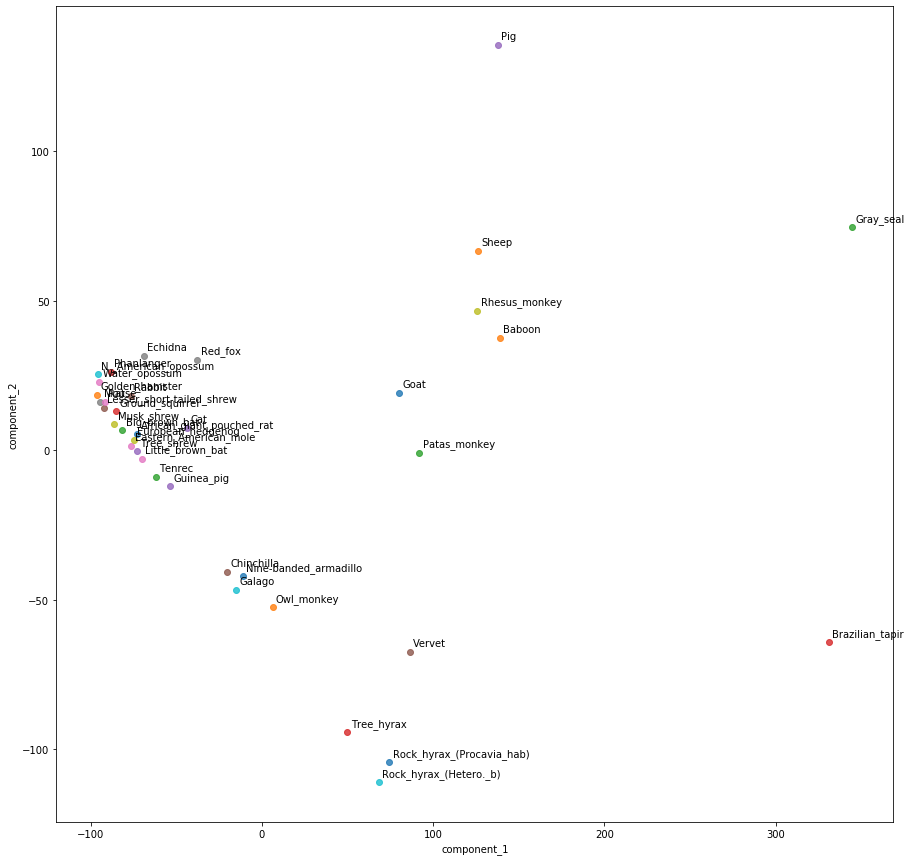

In [45]:
filter_s = ['Human', 'Chimpanzee', 'Cow', 'Horse', 'Asian_elephant']
filtered_species_2 = []
filtered_data_2 = []
for idx, s in enumerate(filtered_species):
    if not (s in filter_s):
        filtered_species_2.append(s)
        filtered_data_2.append(filtered_data[idx])

X_filter_2 = _PCA(attrs, filtered_species_2, filtered_data_2)[0]

plt.figure(figsize=(15,15))
for i in range(len(filtered_species_2)):
    plt.scatter(X_filter_2[i, 0], X_filter_2[i, 1], alpha=0.8, label=filtered_species_2[i])
    plt.annotate(filtered_species_2[i], (X_filter_2[i, 0]+2, X_filter_2[i, 1]+2))
    
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()

mean:  [10.172413793103448 2.2379310344827585 12.410344827586206
 1.3625517241379308 10.559310344827587 10.482758620689655
 72.05172413793103 2.7586206896551726 1.6896551724137931
 2.3448275862068964]
(2,)
(2,)


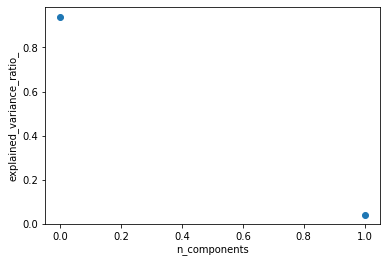

(2, 10)


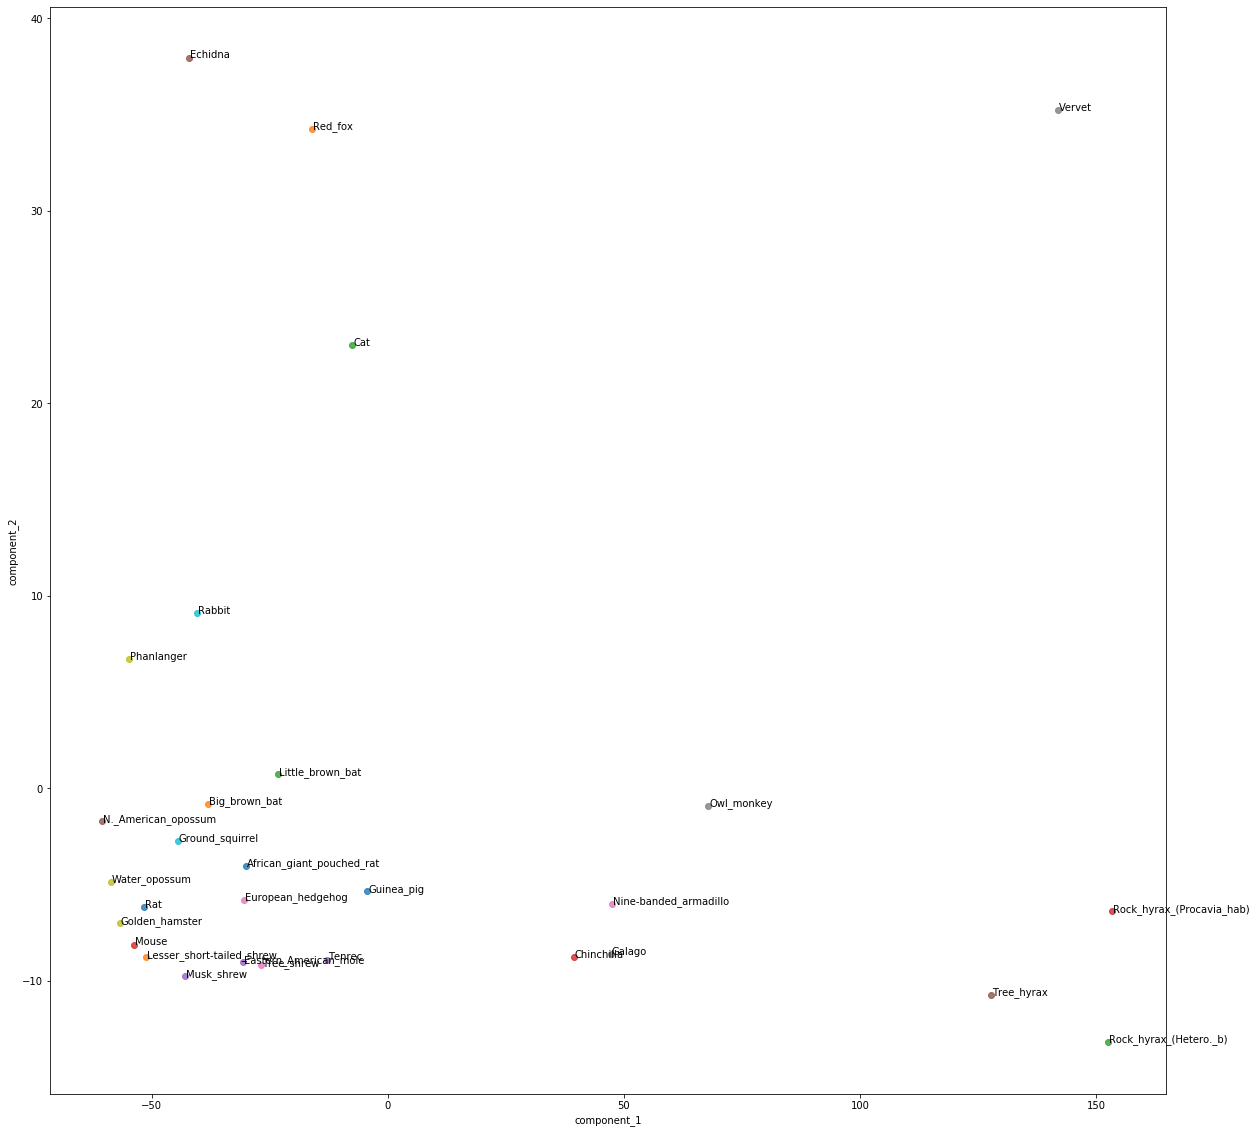

In [52]:
filter_s_2 = ['Pig', 'Gray_seal', 'Sheep', 'Rhesus_monkey', 'Baboon', 'Goat', 'Patas_monkey', 'Brazilian_tapir']
filtered_species_3 = []
filtered_data_3 = []
for idx, s in enumerate(filtered_species_2):
    if not (s in filter_s_2):
        filtered_species_3.append(s)
        filtered_data_3.append(filtered_data_2[idx])

X_filter_3 = _PCA(attrs, filtered_species_3, filtered_data_3)[0]

plt.figure(figsize=(20,20))
for i in range(len(filtered_species_3)):
    plt.scatter(X_filter_3[i, 0], X_filter_3[i, 1], alpha=0.8, label=filtered_species_3[i])
    plt.annotate(filtered_species_3[i], (X_filter_3[i, 0]+0.2, X_filter_3[i, 1]))
    
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()